# K Means Color Quantization

### Imports


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

### The Image

In [27]:
image_as_array = mpimg.imread(r'C:\Users\HP\Desktop\palm_trees.jpg')

In [28]:
image_as_array #(height,widht,colors)    colors = R G B

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [29]:
image_as_array.shape

(1401, 934, 3)

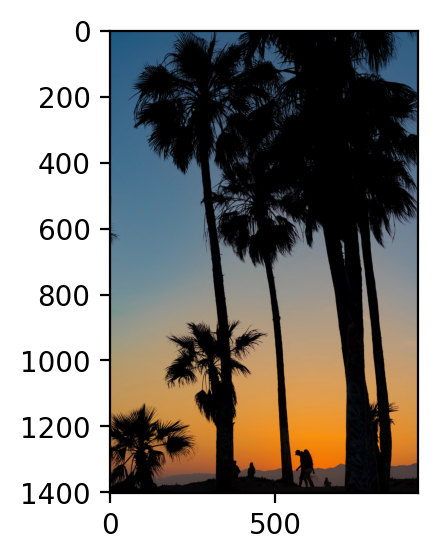

In [30]:
plt.figure(figsize = (4,3),dpi = 200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [31]:
(h,w,c) = image_as_array.shape

In [32]:
image_as_array_2d = image_as_array.reshape(h*w,c)

In [33]:
image_as_array_2d.shape

(1308534, 3)

In [34]:
from sklearn.cluster import KMeans

In [35]:
model = KMeans(n_clusters=10)

In [36]:
labels = model.fit_predict(image_as_array_2d)

In [37]:
labels

array([2, 2, 2, ..., 6, 6, 6])

In [38]:
rgb_code = model.cluster_centers_.astype(int)

In [39]:
rgb_code

array([[208, 153,  88],
       [ 27,  29,  34],
       [ 56,  97, 130],
       [138, 144, 145],
       [228, 135,  35],
       [ 69,  65,  67],
       [  1,   1,   2],
       [176, 154, 126],
       [ 92, 124, 146],
       [155,  97,  57]])

In [40]:
rgb_code[labels]

array([[ 56,  97, 130],
       [ 56,  97, 130],
       [ 56,  97, 130],
       ...,
       [  1,   1,   2],
       [  1,   1,   2],
       [  1,   1,   2]])

In [41]:
quantized_img = np.reshape(rgb_code[labels],(h,w,c))

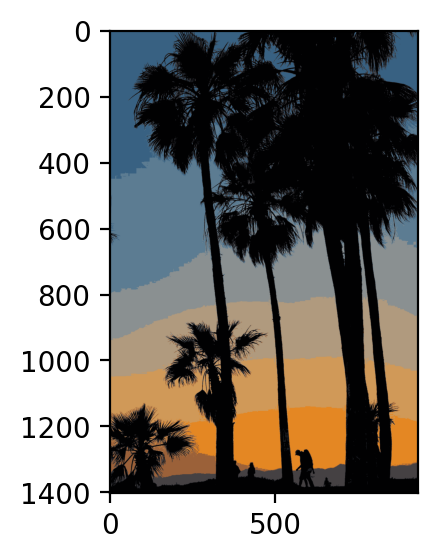

In [42]:
plt.figure(figsize = (4,3),dpi = 200)
plt.imshow(quantized_img)